# Jonathan Halverson
# Thursday, February 23, 2017
# Part 4: Winning percentage by age of UFC fights

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [117]:
iofile = 'data/fightmetric_cards/fightmetric_fights_CLEAN_3-6-2017.csv'
fights = pd.read_csv(iofile, header=0, parse_dates=['Date'])
d = {'Women\'s Featherweight':'W--FW', 'Middleweight':'MW', 'Lightweight':'LW', 'Bantamweight':'BW'}
d['Women\'s Bantamweight'] = 'W--BW'
d['Women\'s Strawweight'] = 'W--SW'
d['Light Heavyweight'] = 'LHW'
d['Flyweight'] = 'FLW'
d['Featherweight'] = 'FTW'
d['Welterweight'] = 'WW'
d['Heavyweight'] = 'HW'
d['Women\'s Flyweight'] = 'W--FLW'
d['Catch Weight'] = 'CTH'
fights.WeightClass = fights.WeightClass.replace(d)
d = {'no contest':'NC'}
fights.Outcome = fights.Outcome.replace(d)
fights.Event = fights.Event.str.replace('The Ultimate Fighter', 'TUF')
fights.Event = fights.Event.str.replace('Fight Night', 'F. Night')
fights.MethodNotes = fights.MethodNotes.str.replace('Rear Naked Choke', 'RNC')
fights.MethodNotes = fights.MethodNotes.str.replace('Spinning Back', 'Spn. Bck.')
fights.columns = ['Winner', 'Out', 'Loser', 'WC', 'Method', 'Notes', 'Rd', 'Time', 'Event', 'Date', 'Location']
cols = ['Winner', 'Out', 'Loser', 'WC', 'Method', 'Notes', 'Rd', 'Time', 'Event', 'Date']
fights.Event = fights.Event.apply(lambda x: x[:x.index(':')] if ':' in x else x)
fights[cols].head(476).to_latex('fights_table.tex', index=False, na_rep='', longtable=True)

In [92]:
fights.shape

(4068, 11)

In [96]:
iofile = 'data/fightmetric_fighters_with_corrections_from_UFC_Wikipedia_CLEAN.csv'
fighters = pd.read_csv(iofile, header=0, parse_dates=['Dob'])
fighters['Age'] = (pd.to_datetime('today') - fighters.Dob) / np.timedelta64(1, 'Y')
fighters.Age = fighters.Age.apply(lambda x: x if pd.isnull(x) else round(x, 1))
fighters.head(480).to_latex('fm_table.tex', index=False, na_rep='', longtable=True)

AttributeError: 'DataFrame' object has no attribute 'WeightClass'

In [57]:
cols = ['Name', 'Weight', 'Height', 'Reach', 'LegReach', 'Stance', 'Dob', 'Age']
df = fights.merge(fighters[cols], how='left', left_on='Winner', right_on='Name')
df.shape

(4068, 19)

In [58]:
df.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location,Name,Weight,Height,Reach,LegReach,Stance,Dob,Age
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",Germaine de Randamie,145.0,69.0,71.0,41.0,Orthodox,1984-04-24,32.9
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",Anderson Silva,185.0,74.0,77.0,42.0,Southpaw,1975-04-14,41.9
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA",Jacare Souza,185.0,73.0,72.0,41.0,Orthodox,1979-12-07,37.3


In [59]:
df = df.merge(fighters[cols], how='left', left_on='Loser', right_on='Name', suffixes=('', '_L'))
df.shape

(4068, 27)

In [60]:
df.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,...,Dob,Age,Name_L,Weight_L,Height_L,Reach_L,LegReach_L,Stance_L,Dob_L,Age_L
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,1984-04-24,32.9,Holly Holm,145.0,68.0,69.0,38.0,Southpaw,1981-10-17,35.4
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,1975-04-14,41.9,Derek Brunson,185.0,73.0,77.0,43.0,Southpaw,1984-01-04,33.2
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,...,1979-12-07,37.3,Tim Boetsch,185.0,72.0,74.0,42.0,Orthodox,1981-01-28,36.1


In [61]:
#df = df.drop(['Name', 'Name_L'], axis=1)

In [62]:
df[df.Dob - df.Dob_L > np.timedelta64(5, 'Y')][['Winner', 'Age', 'Loser', 'Age_L']]

,Winner,Age,Loser,Age_L
4,Dustin Poirier,28.1,Jim Miller,33.5
7,Islam Makhachev,25.4,Nik Lentz,32.6
8,Rick Glenn,27.9,Phillipe Nover,33.1
9,Ryan LaFlare,33.4,Roan Carneiro,38.8
13,Volkan Oezdemir,27.5,Ovince Saint Preux,33.9
14,Marcel Fortuna,31.4,Anthony Hamilton,36.9
15,Jessica Andrade,25.5,Angela Hill,32.2
21,Khalil Rountree Jr.,27.0,Daniel Jolly,32.5
24,Francis Ngannou,30.5,Andrei Arlovski,38.1
26,Sam Alvey,30.8,Nate Marquardt,37.9


In [63]:
wins = df[(df.Outcome == 'def.') & (df.Date > np.datetime64('2005-01-01')) & pd.notnull(df.Dob) & pd.notnull(df.Dob_L)].copy()
wins['Age'] = (wins.Date - wins.Dob) / np.timedelta64(1, 'Y')
wins['Age_L'] = (wins.Date - wins.Dob_L) / np.timedelta64(1, 'Y')

In [64]:
msk1 = wins.Age < 25
msk2 = wins.Age_L < 25
under25 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
under25

0.6242038216560509

In [65]:
wins[msk1].shape[0], wins[msk2].shape[0]

(490, 371)

In [66]:
msk1 = (wins.Age >= 25) & (wins.Age <= 29)
msk2 = (wins.Age_L >= 25) & (wins.Age_L <= 29)
over25under30 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
over25under30

0.6313905930470347

In [67]:
wins[msk1].shape[0], wins[msk2].shape[0]

(1235, 1118)

In [68]:
msk1 = (wins.Age >= 30) & (wins.Age <= 35)
msk2 = (wins.Age_L >= 30) & (wins.Age_L <= 35)
over30under35 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
over30under35

0.5838264299802761

In [69]:
wins[msk1].shape[0], wins[msk2].shape[0]

(1184, 1310)

In [70]:
msk1 = wins.Age > 35
msk2 = wins.Age_L > 35
over35 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
over35

0.47126436781609193

In [71]:
wins[msk1].shape[0], wins[msk2].shape[0]

(287, 394)

In [72]:
wins[msk1 & msk2][['Name', 'Name_L', 'Age', 'Age_L']].shape[0]

72

In [73]:
msk1 = (wins.Age > 35) & (wins.Age_L < 35)
msk2 = (wins.Age_L > 35) & (wins.Age < 35)
over35 = float(wins[msk1].shape[0]) / wins[msk1 | msk2].shape[0]
over35

0.40037243947858475

In [74]:
wins[msk1].shape[0], wins[msk2].shape[0]

(215, 322)

In [75]:
wins.Age = wins.Age.astype(int)
wins.Age_L = wins.Age_L.astype(int)
x=wins.Age.value_counts()/(wins.Age.value_counts() + wins.Age_L.value_counts())

In [76]:
x

18         NaN
19    0.750000
20    0.592593
21    0.590164
22    0.559211
23    0.562500
24    0.572222
25    0.522581
26    0.525394
27    0.555730
28    0.497059
29    0.497765
30    0.512308
31    0.496721
32    0.470019
33    0.451948
34    0.394578
35    0.453333
36    0.407609
37    0.433628
38    0.396552
39    0.416667
40    0.380952
41    0.333333
42    0.181818
43    0.333333
44    0.600000
45    0.250000
46    0.500000
47    0.500000
dtype: float64

(0, 100)

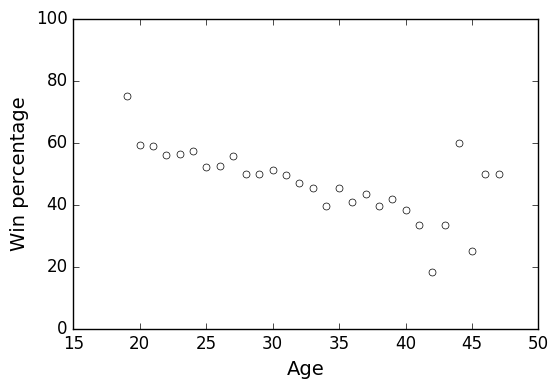

In [121]:
plt.plot(x.index, 100 * x.values, 'wo')
plt.xlabel('Age')
plt.ylabel('Win percentage')
plt.ylim(0, 100)

In [78]:
wins.Age.value_counts() + wins.Age_L.value_counts()

18      NaN
19      4.0
20     27.0
21     61.0
22    152.0
23    256.0
24    360.0
25    465.0
26    571.0
27    637.0
28    680.0
29    671.0
30    650.0
31    610.0
32    517.0
33    385.0
34    332.0
35    225.0
36    184.0
37    113.0
38     58.0
39     36.0
40     21.0
41     12.0
42     11.0
43      6.0
44      5.0
45      4.0
46      4.0
47      2.0
dtype: float64

In [79]:
x

18         NaN
19    0.750000
20    0.592593
21    0.590164
22    0.559211
23    0.562500
24    0.572222
25    0.522581
26    0.525394
27    0.555730
28    0.497059
29    0.497765
30    0.512308
31    0.496721
32    0.470019
33    0.451948
34    0.394578
35    0.453333
36    0.407609
37    0.433628
38    0.396552
39    0.416667
40    0.380952
41    0.333333
42    0.181818
43    0.333333
44    0.600000
45    0.250000
46    0.500000
47    0.500000
dtype: float64

In [128]:
delta_age = (wins.Age_L - wins.Age).value_counts().sort_index()
delta_age

-16      1
-15      1
-14      5
-13      8
-12     16
-11     14
-10     33
-9      39
-8      72
-7      92
-6     108
-5     151
-4     163
-3     194
-2     249
-1     303
 0     249
 1     269
 2     269
 3     294
 4     218
 5     196
 6     152
 7     120
 8     100
 9      65
 10     60
 11     29
 12     23
 13     15
 14     11
 15      6
 16      4
 17      1
dtype: int64

In [132]:
s = delta_age.loc[0:17]
s

0     249
1     269
2     269
3     294
4     218
5     196
6     152
7     120
8     100
9      65
10     60
11     29
12     23
13     15
14     11
15      6
16      4
17      1
dtype: int64

In [127]:
delta_age_overall = np.abs(wins.Age - wins.Age_L).value_counts().sort_index()
delta_age_overall

0     249
1     572
2     518
3     488
4     381
5     347
6     260
7     212
8     172
9     104
10     93
11     43
12     39
13     23
14     16
15      7
16      5
17      1
dtype: int64

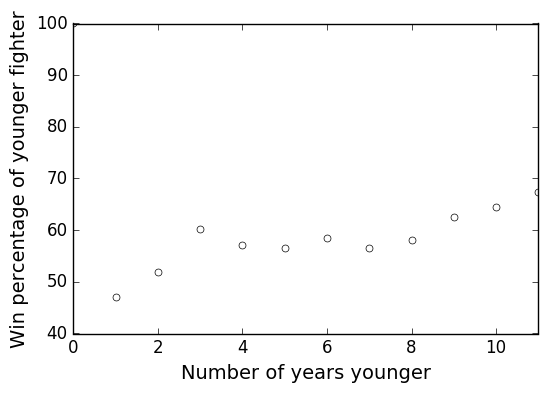

In [139]:
plt.plot(delta_age_overall.index, 100 * s / delta_age_overall, 'wo', y)
plt.xlim(0, 11)
plt.xlabel('Number of years younger')
plt.ylabel('Win percentage of younger fighter')